### Bayes' Theorem

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Bayesian inference derives the [posterior probability](https://en.wikipedia.org/wiki/Posterior_probability) as a [consequence](https://en.wikipedia.org/wiki/Consequence_relation) of two [antecedents](https://en.wikipedia.org/wiki/Antecedent_(logic)): a [prior probability](https://en.wikipedia.org/wiki/Prior_probability) and a "[likelihood function](https://en.wikipedia.org/wiki/Likelihood_function)" derived from a [statistical model](https://en.wikipedia.org/wiki/Statistical_model) for the observed data. Bayesian inference computes the posterior probability according to Bayes' theorem:

$$
\begin{align*}
  P(H|E) &= \frac{P(E|H)P(H)}{P(E)} &\qquad \text{(1)} \\
  \Rightarrow P(H|E) &= \frac{P(E|H)P(H)}{P(E|H)P(H) + P(E|\bar{H})P(\bar{H})} \enspace (\bar{H} \text{ means 'not H'}) &\qquad \text{(2)}
\end{align*}
$$

where:

- **|** means 'event conditional on' (so that (A|B) means A given B);

- **H** stands for any hypothesis whose probability may be affected by data (called __evidence__ below). Often there are competing hypotheses, and the task is to determine which is the most probable;

- **P(H)**, the [prior probability](https://en.wikipedia.org/wiki/Prior_probability), is the estimate of the probability of the hypothesis H before the data E, the current evidence, is observed;

- **E** (evidence) corresponds to new data that were not used in computing the prior probability;

- **P(H|E)**, the [posterior probability](https://en.wikipedia.org/wiki/Posterior_probability), is the probability of H given E, i.e., after E is observed. This is what we want to know: the probability of a hypothesis given the observed evidence;

- **P(E|H)** is the probability of observing E given H, and is called the [likelihood](https://en.wikipedia.org/wiki/Likelihood_function). As a function of E with H fixed, it indicates the compatibility of the evidence with the given hypothesis. The likelihood function is a function of the evidence E, while the posterior probability is a function of the hypothesis H;

- **P(E)** is sometimes termed the [marginal likelihood](https://en.wikipedia.org/wiki/Marginal_likelihood) or 'model evidence'. This factor is the same for all possible hypotheses being considered (as is evident from the fact that the hypothesis H does not appear anywhere in the symbol, unlike for all the other factors), so this factor does not enter into determining the relative probabilities of different hypotheses;

#### Probability Function and Likelihood Function

To function $P(E|H)$:

- **Probability Function**
  - If **H** is fixed, and __E__ is the independent variable, then this function is called probability function, which tells the occurrence probability of each evidence E by given H;
  
  
- **Likelihood Function**
  - If **E** is fixed, and __H__ is the independent variable, then this function is called likelihood function, which tells the occurrence probability of this fixed evidence E under different H;

### MLE (Maximum Likelihood Estimation)

**Conclusion**: combine with above __Likelihood Function__ definition, MLE is such an estimation: trying to find out the H which has the most probability to make the evidence E happen, that is: maximize the $P(E|H)$.

Lets walk MLE through the classical game 'coin flipping': we got one coin, and we want to find out whether it has uniform density or not, that is: if we test it out with the coin flipping experiment, what are the probabilities for the events 'the head faces up' and 'the tail faces up' respectively?

Lets use $\theta$ to represent the probability of the event 'the head faces up', and also 0 -> 'tail up', 1 -> 'head up'.

We flipped the coin 10 times, and got the evidence $x_0$: 0 1 1 1 1 0 1 1 1 0, and the 'coin flipping' model should subject to the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution), then we can define the likelihood function for the evidence $x_0$:

$$
f(x_0, \theta) = (1 - \theta) \times \theta \times \theta \times \theta \times \theta \times (1 - \theta) \times \theta \times \theta \times \theta \times (1 - \theta) = \theta^7(1 - \theta)^3 = f(\theta)
$$

and according to the above conclusion we revealed for MLE, what MLE wants is just to maximize the above $f(\theta)$, that is: find out the $\theta$ (H: hypothesis) which has the most probability to make the happened evidence $x_0$ to happen.

Lets draw function $f(\theta)$:

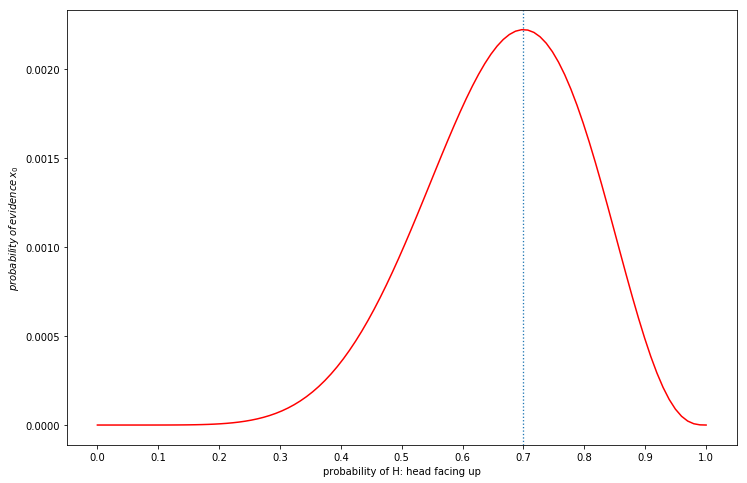

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(theta):
    return np.power(theta, 7) * np.power(1 - theta, 3)

x = np.linspace(0., 1., num=100, endpoint=True,)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f(x), 'r')
ax.set_xticks(np.linspace(0., 1., num=11, endpoint=True))
ax.set_xlabel('probability of H: head facing up')
ax.set_ylabel('$probability \, of \, evidence \, x_0$')

vline = ax.axvline(x=0.7)
vline.set_linestyle('dotted')
vline.set_linewidth(1.3)

We can clearly get from above graph that when $\theta = 0.7$ the evidence $x_0$ has the most probability to happen.

But someone may would argue: **USUALLY** one conin has uniform density, even you did above experiment, and got the evidence $x_0$, i will NOT believe that flipping one coin the probability of its head facing up is 0.7!

Hmmm, from certain common sense (prior probability: flipping one coin the probability of its head facing up should be 0.5) we should feel there do is some flaws in MLE, so lets fix it in this way: at the meanwhile lets consider the prior probability also, that is: **not only consider the H which has the most probability to make the evidence E happen, but also consider that the H itself should have the most probability to happen in reality (the prior probability of H)!** This is the MAP (Maximum A Posteriori probability), we will talk its details in next section.

### MAP (Maximum A Posteriori probability)

**Conclusion**: MLE is trying to find out the H which has the most probability to make the evidence E happen, MAP not only requires that, but also requires that the H itself has the most probability to happen in reality (considering the prior probability of H), that is: maximize the $P(E|H)P(H)$.

To above coin flipping experiment, we prior know that $\theta$ has a lot more chance to be 0.5, and has less chance to be other values, so we can use the [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) to describe this prior knowledge we prior know about $\theta$: we assume $\theta$ subjects to a normal distribution with $\mu = 0.5$, and $\sigma^2 = 0.1$ $\Rightarrow$ its PDF (probability density function):

$$
\begin{align*}
  P(\theta) &= \frac{1}{\sqrt{2\pi 0.1}}e^{-\frac{(\theta - 0.5)^2}{2(0.1)}} \
  = \frac{1}{\sqrt{0.2\pi}}e^{-\frac{(\theta - 0.5)^2}{0.2}} \\
  \Rightarrow P(x_0|\theta)P(\theta) &= \theta^7(1 - \theta)^3 P(\theta) \
  = \frac{1}{\sqrt{0.2\pi}}\theta^7(1 - \theta)^3 e^{-\frac{(\theta - 0.5)^2}{0.2}}
\end{align*}
$$

Lets draw $P(x_0|\theta)P(\theta)$:

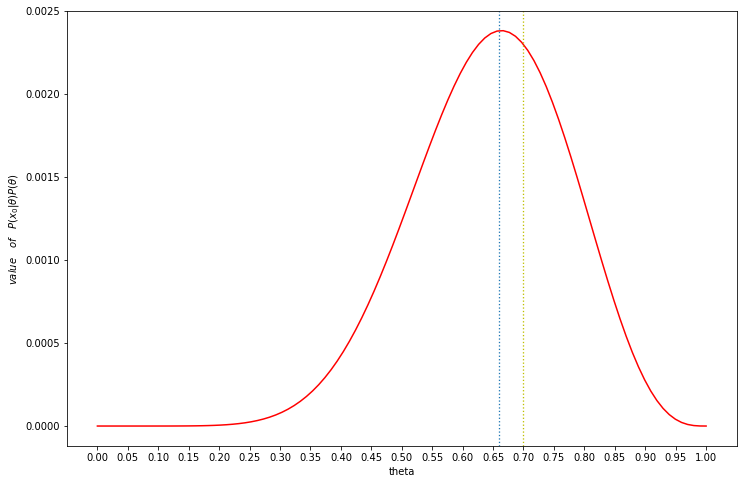

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(theta):
    return 1 / np.sqrt(0.2 * np.pi) \
             * np.power(theta, 7) \
             * np.power(1 - theta, 3) \
             * np.power(np.e, -np.power(theta - 0.5, 2) / 0.2)

x = np.linspace(0., 1., num=100, endpoint=True,)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f(x), 'r')
ax.set_xticks(np.linspace(0., 1., num=21, endpoint=True))
ax.set_xlabel('theta')
ax.set_ylabel('$value \quad of \quad P(x_0|\\theta)P(\\theta)$')

vline = ax.axvline(x=0.7)
vline.set_linestyle('dotted')
vline.set_linewidth(1.3)
vline.set_color('y')

vline = ax.axvline(x=0.66)
vline.set_linestyle('dotted')
vline.set_linewidth(1.3)

So see, after we considered the prior probability of $\theta$, the result we got moved a bit to the left; from 0.7 $\to$ 0.66, a bit more closer to the prior knowledge we have, that is MAP.

### References

- [详解最大似然估计（MLE）、最大后验概率估计（MAP），以及贝叶斯公式的理解](https://blog.csdn.net/u011508640/article/details/72815981)

- [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)

- [Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference)